### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

### Replace Non-Disclosed Values with:
### Average Employees per Establishment * Number of Establishments
###### Some employment levels (Emplv) were not reported, however the count of establishments  (Qtrly_Estabs) was reported for all instances.
###### So, the average number of employees per an establishment where the employment level is not missing (reported as zero with more than one establishment) is taken for each NAICS-sector, and then multiplied by the number of establishments

In [ ]:
AFFH = np.array(df['Agriculture_Forestry_Fishing_and_Hunting_Emplv'] / 
               df['Agriculture_Forestry_Fishing_and_Hunting_Qtrly_Estabs'])
AFFH = AFFH[AFFH > 0].mean()

MQOGE = np.array(df['Mining_Quarrying_and_Oil_and_Gas_Extraction_Emplv'] / 
               df['Mining_Quarrying_and_Oil_and_Gas_Extraction_Qtrly_Estabs'])
MQOGE = MQOGE[MQOGE > 0].mean()

UTL = np.array(df['Utilities_Emplv'] / df['Utilities_Qtrly_Estabs'])
UTL = UTL[UTL > 0].mean()

CON = np.array(df['Construction_Emplv'] / df['Construction_Qtrly_Estabs'])
CON = CON[CON > 0].mean()

MAN = np.array(df['Manufacturing_Emplv'] / df['Manufacturing_Qtrly_Estabs'])
MAN = MAN[MAN > 0].mean()

WTD = np.array(df['Wholesale_Trade_Emplv'] / df['Wholesale_Trade_Qtrly_Estabs'])
WTD = WTD[WTD > 0].mean()

RTD = np.array(df['Retail_Trade_Emplv'] / df['Retail_Trade_Qtrly_Estabs'])
RTD = RTD[RTD > 0].mean()

TWH = np.array(df['Transportation_and_Warehousing_Emplv'] / 
               df['Transportation_and_Warehousing_Qtrly_Estabs'])
TWH = TWH[TWH > 0].mean()

INF = np.array(df['Information_Emplv'] / df['Information_Qtrly_Estabs'])
INF = INF[INF > 0].mean()

FIS = np.array(df['Finance_and_Insurance_Emplv'] / df['Finance_and_Insurance_Qtrly_Estabs'])
FIS = FIS[FIS > 0].mean()

RERL = np.array(df['Real_Estate_and_Rental_and_Leasing_Emplv'] / 
               df['Real_Estate_and_Rental_and_Leasing_Qtrly_Estabs'])
RERL = RERL[RERL > 0].mean()

PTS = np.array(df['Professional_and_Technical_Services_Emplv'] /
              df['Professional_and_Technical_Services_Qtrly_Estabs'])
PTS = PTS[PTS > 0].mean()

MCE = np.array(df['Management_of_Companies_and_Enterprises_Emplv'] / 
               df['Management_of_Companies_and_Enterprises_Qtrly_Estabs'])
MCE = MCE[MCE > 0].mean()

AWS = np.array(df['Administrative_and_Waste_Services_Emplv'] / 
               df['Administrative_and_Waste_Services_Qtrly_Estabs'])
AWS = AWS[AWS > 0].mean()

EDS = np.array(df['Educational_Services_Emplv'] / df['Educational_Services_Qtrly_Estabs'])
EDS = EDS[EDS > 0].mean()

HCSA = np.array(df['Health_Care_and_Social_Assistance_Emplv'] / 
               df['Health_Care_and_Social_Assistance_Qtrly_Estabs'])
HCSA = HCSA[HCSA > 0].mean()

AER = np.array(df['Arts_Entertainment_and_Recreation_Emplv'] / 
               df['Arts_Entertainment_and_Recreation_Qtrly_Estabs'])
AER = AER[AER > 0].mean()

AFS = np.array(df['Accommodation_and_Food_Services_Emplv'] / 
               df['Accommodation_and_Food_Services_Qtrly_Estabs'])
AFS = AFS[AFS > 0].mean()

OSEPA = np.array(df['Other_Services_Except_Public_Administration_Emplv'] / 
               df['Transportation_and_Warehousing_Qtrly_Estabs'])
OSEPA = OSEPA[OSEPA > 0].mean()

PAD = np.array(df['Public_Administration_Emplv'] / 
               df['Public_Administration_Qtrly_Estabs'])
PAD = PAD[PAD > 0].mean()



df.loc[df['Agriculture_Forestry_Fishing_and_Hunting_Emplv'] == 0
,'Agriculture_Forestry_Fishing_and_Hunting_Emplv'] = df['Agriculture_Forestry_Fishing_and_Hunting_Qtrly_Estabs'] * AFFH

df.loc[df['Mining_Quarrying_and_Oil_and_Gas_Extraction_Emplv'] == 0
,'Mining_Quarrying_and_Oil_and_Gas_Extraction_Emplv'] = df['Mining_Quarrying_and_Oil_and_Gas_Extraction_Qtrly_Estabs'] * MQOGE

df.loc[df['Utilities_Emplv'] == 0
,'Utilities_Emplv'] = df['Utilities_Qtrly_Estabs'] * UTL

df.loc[df['Construction_Emplv'] == 0
,'Construction_Emplv'] = df['Construction_Qtrly_Estabs'] * CON

df.loc[df['Manufacturing_Emplv'] == 0
,'Manufacturing_Emplv'] = df['Manufacturing_Qtrly_Estabs'] * MAN

df.loc[df['Wholesale_Trade_Emplv'] == 0
,'Wholesale_Trade_Emplv'] = df['Wholesale_Trade_Qtrly_Estabs'] * WTD

df.loc[df['Retail_Trade_Emplv'] == 0
,'Retail_Trade_Emplv'] = df['Retail_Trade_Qtrly_Estabs'] * RTD

df.loc[df['Transportation_and_Warehousing_Emplv'] == 0
,'Transportation_and_Warehousing_Emplv'] = df['Transportation_and_Warehousing_Qtrly_Estabs'] * TWH

df.loc[df['Information_Emplv'] == 0
,'Information_Emplv'] = df['Information_Qtrly_Estabs'] * INF

df.loc[df['Finance_and_Insurance_Emplv'] == 0
,'Finance_and_Insurance_Emplv'] = df['Finance_and_Insurance_Qtrly_Estabs'] * FIS

df.loc[df['Real_Estate_and_Rental_and_Leasing_Emplv'] == 0
,'Real_Estate_and_Rental_and_Leasing_Emplv'] = df['Real_Estate_and_Rental_and_Leasing_Qtrly_Estabs'] * RERL

df.loc[df['Professional_and_Technical_Services_Emplv'] == 0
,'Professional_and_Technical_Services_Emplv'] = df['Professional_and_Technical_Services_Qtrly_Estabs'] * PTS

df.loc[df['Management_of_Companies_and_Enterprises_Emplv'] == 0
,'Management_of_Companies_and_Enterprises_Emplv'] = df['Management_of_Companies_and_Enterprises_Qtrly_Estabs'] * MCE

df.loc[df['Administrative_and_Waste_Services_Emplv'] == 0
,'Administrative_and_Waste_Services_Emplv'] = df['Administrative_and_Waste_Services_Qtrly_Estabs'] * AWS

df.loc[df['Educational_Services_Emplv'] == 0
,'Educational_Services_Emplv'] = df['Educational_Services_Qtrly_Estabs'] * EDS

df.loc[df['Health_Care_and_Social_Assistance_Emplv'] == 0
,'Health_Care_and_Social_Assistance_Emplv'] = df['Health_Care_and_Social_Assistance_Qtrly_Estabs'] * HCSA

df.loc[df['Arts_Entertainment_and_Recreation_Emplv'] == 0
,'Arts_Entertainment_and_Recreation_Emplv'] = df['Arts_Entertainment_and_Recreation_Qtrly_Estabs'] * AER

df.loc[df['Accommodation_and_Food_Services_Emplv'] == 0
,'Accommodation_and_Food_Services_Emplv'] = df['Accommodation_and_Food_Services_Qtrly_Estabs'] * AFS

df.loc[df['Other_Services_Except_Public_Administration_Emplv'] == 0
,'Other_Services_Except_Public_Administration_Emplv'] = df['Other_Services_Except_Public_Administration_Qtrly_Estabs'] * OSEPA

df.loc[df['Public_Administration_Emplv'] == 0
,'Public_Administration_Emplv'] = df['Public_Administration_Qtrly_Estabs'] * PAD

In [2]:
df = pd.read_csv(r"C:\Users\steve\Documents\Medicaid_COVID-19\Polished\Enr_Ind_14_19_Qtr_Em_2.csv"
                ,converters={'area_fips': lambda x: str(x)})

### Define X and y
###### Quarterly Establishments columns are removed before this step.
###### X is defined as each NAICS-sector's employment level and population all quarterly, at the county level (n=1609).
###### Y is defined as either total Alabma Medicaid Agency enrollment (McaidTot) or Alabama Medicaid Agency child enrollment (children) also quarterly, at the county level.

In [3]:
#Done to conteract for loop and maintain unemployment rate
df['UR'] = (df['UR'] * df['Population']) / 100

#Copy df and drop non-predictors
X = df.copy()
X.drop(['area_fips', 'Year', 'Qtr', 'Children', 'McaidTot', 'CountyName']
       ,axis = 1, inplace = True)

#For loop dividing all columns by the population
colm = list(X.columns.values)
for col in colm:
    X[col] = (X[col]/X['Population'])
    
#Drop population because it is all 1s and replace with df.Population    
X.drop(['Population'], axis = 1, inplace = True)
X['Population'] = df['Population']

col = list(X.columns.values)

#Define ys for total and child enrollment
yt = np.log(df['McaidTot'])
yc = np.log(df['Children'])

### Partion and Standardize
###### A machine learning model with cross-validation will be used so partitioning the data (randomly making two data sets) is neccessary
###### preprocessing.scale puts all the predictors on the same scale. This is particularly important for population as it is in the thousands, while the rest of the predictors are between 0 and 1

In [4]:
X_train, X_test, yt_train, yt_test, yc_train, yc_test = train_test_split(X, yt, yc
                                                        ,test_size = 0.33, random_state = 42)

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

### Run a grid search to optimize lambda (a.k.a. alpha) for both lasso regressions
###### Further optimization reveals an alpha of 0.001 for total and 0.0009 for children

In [ ]:
param_grid = { 'alpha': 
              [.00001, .0001, .001, .01, .1]
             }
grid_search = GridSearchCV(estimator = Lasso(), param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, yt_train)
print('Total:', grid_search.best_params_)

In [ ]:
param_grid = { 'alpha': 
              [.00001, .0001, .001, .01, .1]
             }
grid_search = GridSearchCV(estimator = Lasso(), param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, yc_train)
print('Children:', grid_search.best_params_)

### Run optimized models and return R2s

In [6]:
#Define medel based on alpha selected by grid search
lasso_opt_t = Lasso(alpha = 0.001)

#Fit model to training dataset
lasso_opt_t.fit(X_train, yt_train)

#Use fitted model to predict test data set and return R2
yt_pred = lasso_opt_t.predict(X_test)
print('R2 Total:', metrics.r2_score(yt_test, yt_pred))

R2 Total: 0.9239898564566531


In [7]:
#Define medel based on alpha selected by grid search
lasso_opt_c = Lasso(alpha = 0.0009)

#Fit model to training dataset
lasso_opt_c.fit(X_train, yc_train)

#Use fitted model to predict test data set and return R2
yc_pred = lasso_opt_c.predict(X_test)
print('R2 Children:', metrics.r2_score(yc_test, yc_pred))

R2 Children: 0.9210775758732279


### Ensure residual vs predicted plots are valid
###### If there is a clear pattern then our lasso regression is not a viable model.
###### Although they are not perfectly random, no clear pattern is visible in either plot

Residual vs. Predicted Total


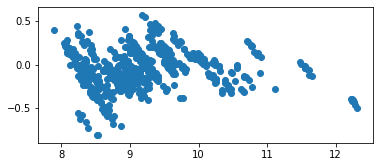

In [15]:
#Define predicted value by predicting test data set and residual by subtracting the true y
#by the predicted y
pred_val = lasso_opt_t.predict(X_test)
true_val = yt_test
residual = true_val - pred_val

#Plot these numbers
fig, ax = plt.subplots(figsize=(6,2.5))
print('Residual vs. Predicted Total')
_ = ax.scatter(pred_val, residual)

Residual vs. Predicted Children


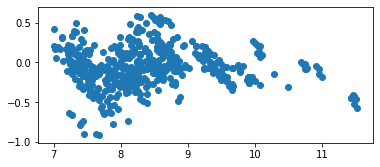

In [16]:
#Define predicted value by predicting test data set and residual by subtracting the true y
#by the predicted y
pred_val = lasso_opt_c.predict(X_test)
true_val = yc_test
residual = true_val - pred_val

#Plot these numbers
fig, ax = plt.subplots(figsize=(6,2.5))
print('Residual vs. Predicted Children')
_ = ax.scatter(pred_val, residual)

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

### Return lasso coefficients

In [11]:
#Get dimension names
Xcol = X.copy()

#Put into proper data format
coefficients_t = pd.DataFrame(pd.concat([pd.DataFrame(Xcol.columns),pd.DataFrame(
    np.transpose(lasso_opt_t.coef_))], axis = 1))
coefficients_t = coefficients_t.values
coefficients_t = pd.DataFrame(coefficients_t, columns = ['Dimension', 'Coefficient'])

#Exclude coefficients equal to zero
coef_not_zero_t = coefficients_t[coefficients_t['Coefficient']!=0]

#Sort and print coefficients
coef_not_zero_t = coef_not_zero_t.sort_values(by = ['Coefficient']).reset_index()
print('Total')
print(coef_not_zero_t[['Dimension', 'Coefficient']])

Total
                                      Dimension Coefficient
0                                          Aged   -0.237667
1      Agriculture_Forestry_Fishing_and_Hunting   -0.132917
2                                   Information  -0.0750106
3             Arts_Entertainment_and_Recreation  -0.0613108
4                                         Other  -0.0587003
5                         Finance_and_Insurance  -0.0506399
6                                           PST  -0.0415661
7           Professional_and_Technical_Services  -0.0345267
8                                     Utilities  -0.0341291
9               Accommodation_and_Food_Services  -0.0231588
10                                Manufacturing  -0.0190762
11                        Public_Administration  -0.0153063
12                                           UR  -0.0105631
13      Management_of_Companies_and_Enterprises -0.00714386
14                              Wholesale_Trade -0.00211012
15  Other_Services_Except_Public_A

In [12]:
#Put into proper data format
coefficients_c = pd.DataFrame(pd.concat([pd.DataFrame(Xcol.columns),pd.DataFrame(
    np.transpose(lasso_opt_c.coef_))], axis = 1))
coefficients_c = coefficients_c.values
coefficients_c = pd.DataFrame(coefficients_c, columns = ['Dimension', 'Coefficient'])

#Exclude coefficients equal to zero
coef_not_zero_c = coefficients_c[coefficients_c['Coefficient']!=0]

#Sort and print coefficients
coef_not_zero_c = coef_not_zero_c.sort_values(by = ['Coefficient']).reset_index()
print('Children')
print(coef_not_zero_c[['Dimension', 'Coefficient']])

Children
                                      Dimension Coefficient
0                                          Aged   -0.266563
1      Agriculture_Forestry_Fishing_and_Hunting   -0.134917
2                                         Other   -0.107948
3                                   Information  -0.0732111
4             Arts_Entertainment_and_Recreation  -0.0628562
5                                           PST  -0.0532079
6                         Finance_and_Insurance  -0.0414774
7                         Public_Administration   -0.031517
8                                     Utilities  -0.0299395
9           Professional_and_Technical_Services  -0.0219887
10              Accommodation_and_Food_Services  -0.0160414
11                                Manufacturing  -0.0152113
12      Management_of_Companies_and_Enterprises -0.00828337
13                              Wholesale_Trade -0.00664408
14            Health_Care_and_Social_Assistance  0.00630751
15                             